In [111]:
# import required dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [112]:
# Set display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [260]:
# Read in the data
employees = pd.read_csv('./Attrition_Rate_Prediction/Dataset/Train.csv')

In [114]:
# Create a copy of the dataframe
copy_employees = employees.copy()

In [261]:
employees.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [262]:
employees[employees['Time_of_service'] == 0].shape[0]

162

In [263]:
employees['Relationship_Status'].unique()

array(['Married', 'Single'], dtype=object)

#### Observations
* Travel_Rate should range from 1-3 but there seems to be 0 in the data
* There are null values in the data

### Exploratory Data Analysis

#### Data Cleaning and preliminary EDA

In [264]:
# Check for null values
pd.isnull(employees).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

#### Columns with null values
* Age
* Time of service
* Var2
* Var4

In [265]:
# Drop irrelevant columns i.e. Employee_ID. Doesn help us in the analysis
employees.drop("Employee_ID", axis=1, inplace=True)

In [266]:
employees.head(1)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841


In [267]:
# Check on the data types in each column
employees.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [268]:
# Check for duplicated entries/ observations in the data
employees[employees.duplicated(keep='first')]

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [269]:
# Get some statistical summary on the data
employees.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


#### Observations:
* There seems to be a good number of categorical variables in the data in numerical format


* **Continuous variables:** Time_of_service, Time_since_promotion, growth_rate, VAR2, VAR3, 


* **Categorical variables:** Age, Education_Level, Travel_Rate, Post_Level, Pay_Scale, Work_Life_Balance, VAR1, VAR4, VAR5, VAR6, VAR7


In [270]:
pd.isnull(employees).sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

#### Create imputers for the null values and combine them with the column transformer

In [271]:
# Impute the null values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


continuous_imputer= SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

continuous_cols = ["Age", "Time_of_service", "VAR2"]
categorical_cols = ["Pay_Scale", "Work_Life_balance", "VAR4"]

employees[continuous_cols] = continuous_imputer.fit_transform(employees[continuous_cols])
employees[categorical_cols] = categorical_imputer.fit_transform(employees[categorical_cols])

# impute_transformer = ColumnTransformer([("continuous_imputer", continuous_imputer, continuous_cols),
#                                         ("categorical_imputer", categorical_imputer, categorical_cols)], remainder='passthrough', verbose=True)

In [272]:
ColumnTransformer?

In [273]:
categorical_cols

['Pay_Scale', 'Work_Life_balance', 'VAR4']

#### Exploratory Data Analysis

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002066D2B8320>,
      dtype=object)

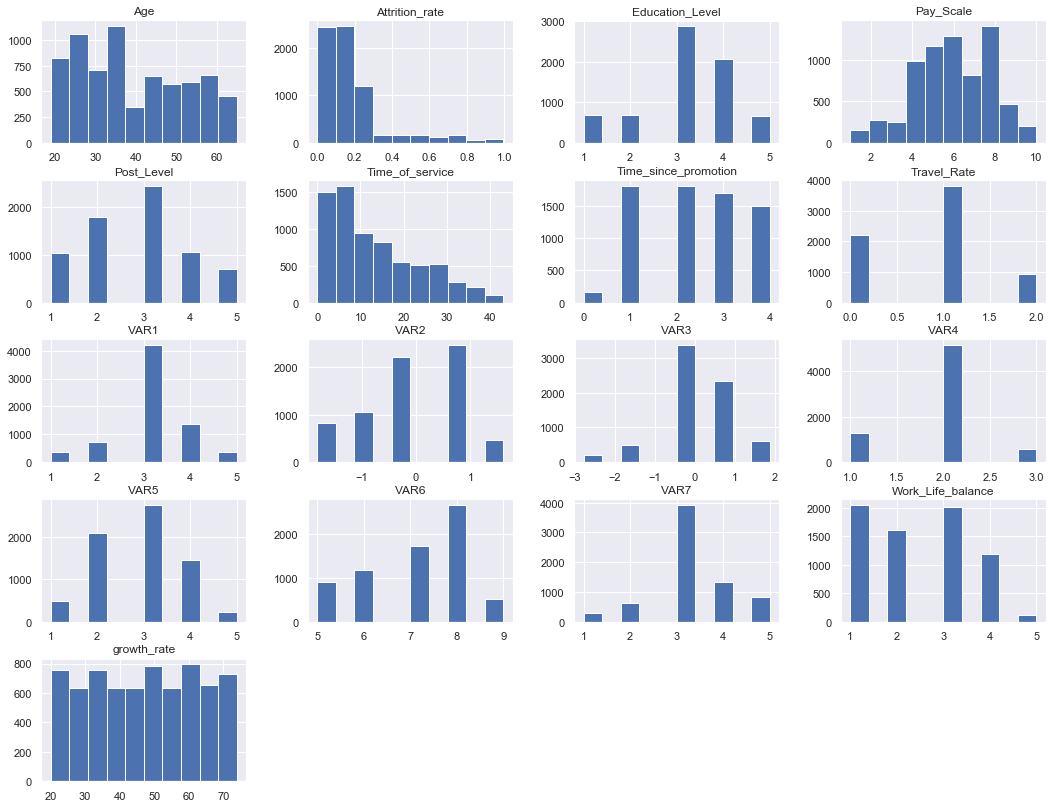

In [274]:
# Check the distribution of the data
fig, ax = plt.subplots(figsize=(18,14))
employees.hist(ax=ax)

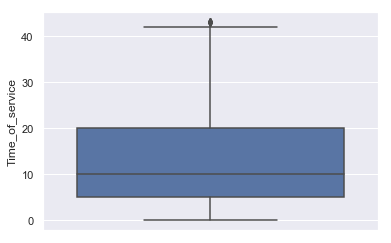

In [275]:
# Check for outliers in Time_of_service and Pay_Scale
sns.boxplot(y='Time_of_service', data=employees)

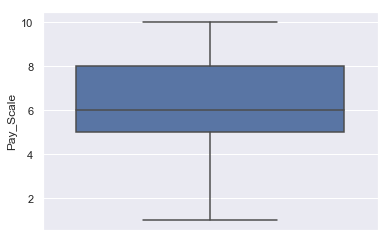

In [276]:
sns.boxplot(y='Pay_Scale', data=employees)

#### Observations:
* Both features have no outliers

#### Check for a relationship between the features and the target (Attrition_Rate)

In [277]:
from ipywidgets import widgets

def plot_feature(feature):
    employees.plot(kind="scatter", x=feature, y='Attrition_rate', alpha=0.4)

cols  = {col : col for col in employees[continuous_cols].columns}

widgets.interact(plot_feature, feature=cols)

interactive(children=(Dropdown(description='feature', options={'Age': 'Age', 'Time_of_service': 'Time_of_service', 'VAR2': 'VAR2'}, value='Age'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_feature>

#### Observations:
* The doesn't seem to be any direct relationship between the continuous features and the target

#### Continue with data processing and checking the relationships of the data. feature to target and featire to feature. Ensure you have a good understanding of what data type each column falls into for better analysis and processing

In [278]:
employees.corr()['Attrition_rate'].sort_values(ascending=False)

Attrition_rate          1.000000
Work_Life_balance       0.020975
Post_Level              0.016402
growth_rate             0.014247
Time_since_promotion    0.013880
VAR3                    0.001245
VAR6                   -0.003130
VAR5                   -0.004770
VAR1                   -0.008073
Education_Level        -0.008143
Travel_Rate            -0.012608
VAR4                   -0.013364
Age                    -0.014760
Pay_Scale              -0.015043
VAR7                   -0.015299
Time_of_service        -0.017203
VAR2                   -0.022751
Name: Attrition_rate, dtype: float64

#### Observation:
* There's minimal linear correlation between the between the features and the target

#### Check how features correlate to each other

In [279]:
employees.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005370,0.880620,0.140875,0.001430,0.011663,0.001360,0.012007,0.003275,0.004871,0.005968,0.007420,0.000357,0.000125,-0.001691,0.008218,-0.014760
Education_Level,-0.005370,1.000000,-0.012774,-0.002077,0.002991,-0.017690,0.009986,0.006866,-0.014715,-0.002185,-0.010076,-0.009689,0.004731,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.880620,-0.012774,1.000000,0.134779,-0.004045,0.003825,-0.001817,0.019844,-0.002894,0.004664,0.003345,0.006551,-0.005595,0.003412,0.007032,0.006354,-0.017203
Time_since_promotion,0.140875,-0.002077,0.134779,1.000000,0.014147,-0.012061,-0.008851,-0.010011,-0.007557,-0.002873,0.004133,-0.002783,-0.003029,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001430,0.002991,-0.004045,0.014147,1.000000,0.008460,-0.006887,-0.004681,-0.017525,0.001351,0.010594,0.010991,0.020005,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.011663,-0.017690,0.003825,-0.012061,0.008460,1.000000,0.021299,-0.012605,0.004668,0.023898,0.007772,-0.009019,-0.005177,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.001360,0.009986,-0.001817,-0.008851,-0.006887,0.021299,1.000000,0.022817,-0.014931,-0.008458,-0.006379,0.010387,-0.012055,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012007,0.006866,0.019844,-0.010011,-0.004681,-0.012605,0.022817,1.000000,-0.023230,0.010531,0.006304,0.003309,-0.010843,0.017690,-0.011821,0.002330,-0.015043
Work_Life_balance,0.003275,-0.014715,-0.002894,-0.007557,-0.017525,0.004668,-0.014931,-0.023230,1.000000,-0.021770,-0.002601,0.004295,-0.026315,0.021244,0.003882,0.023108,0.020975
VAR1,0.004871,-0.002185,0.004664,-0.002873,0.001351,0.023898,-0.008458,0.010531,-0.021770,1.000000,0.001934,-0.003318,0.001391,0.007904,-0.002771,0.009355,-0.008073


#### Observations:
* Age and Time of service have a very high correlation of 0.9. Assumption is that older employees have worked in the company for a longer period. Also implies that most hires are younger people

* Growth_rate has a weak +ve correlation with VAR4

* Travel rate has a weak +ve correlation with VAR1 Post_level

* Post level has a weak +ve correlation with Pay scale

* Post level has a weak -ve correlation with Worl life balance


### Feature Engineering

#### Encode categorical variables

In [280]:
employees.head(1)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841


In [281]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Gender", "Relationship_Status", "Hometown", "Unit", "Decision_skill_possess", "Compensation_and_Benefits"]

onehot_enc = OneHotEncoder(sparse=False, categories='auto')

for col in cat_cols:
    employees[col] = onehot_enc.fit_transform(employees[col].reshape(-1,1))

# encoder_transform = ColumnTransformer([("onehot_enc", onehot_enc, cat_cols)], sparse_threshold=0)

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Kelvin Kinda\Ana

#### Create a growth per anum feature

In [282]:
# Divide growth rate by time of service to understand how much an employee has grown per year on average 
# employees["Growth_per_ServiceYear"] = employees["growth_rate"] / employees["Time_of_service"]

In [283]:
def new_columns(employees): 
    employees["Growth_per_ServiceYear"] = employees.apply(lambda x: (x["growth_rate"] / 1) if x['Time_of_service'] == 0 else (x["growth_rate"] / x['Time_of_service']), axis=1)
    
    return employees

employees = new_columns(employees)

#### Create interaction features

In [284]:
from sklearn.preprocessing import PolynomialFeatures

In [337]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

#### Scale the data

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### Build the Models

#### Split the data into train and test

In [332]:
from sklearn.model_selection import train_test_split

X = employees.drop(["Attrition_rate"], axis=1)
y = employees["Attrition_rate"]

best_features = ['Education_Level', 'Time_since_promotion', 'growth_rate', 'VAR7', 'Post_Level', 'Pay_Scale', 'VAR2', 'Work_Life_balance', 'VAR6', 'Growth_per_ServiceYear']

X = employees[best_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [333]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 10), (1400, 10), (5600,), (1400,))

In [334]:
X_train.columns

Index(['Education_Level', 'Time_since_promotion', 'growth_rate', 'VAR7',
       'Post_Level', 'Pay_Scale', 'VAR2', 'Work_Life_balance', 'VAR6',
       'Growth_per_ServiceYear'],
      dtype='object')

#### Build a pipeline with the tranformations

In [335]:
from sklearn.pipeline import Pipeline

pipe_transform = Pipeline([("scaler", scaler)])

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error

#### Transform X_test

In [339]:
X_test = poly.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)

#### LinearRegression

In [342]:
linear_reg = LinearRegression(fit_intercept=True)

pipe_lr = Pipeline([("poly", poly), ("scaler", scaler), ("linear_reg", linear_reg)])
pipe_lr.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test)
y_preds = linear_reg.predict(X_test)

score = 100 * max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

81.00433806827273


#### Ridge

In [343]:
ridge = Ridge(alpha=10.0, max_iter=1000, solver='svd')

pipe_ridge = Pipeline([("poly", poly), ("scaler", scaler), ("ridge", ridge)])
pipe_ridge.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = ridge.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

81.02959655290866


#### Decision Tree

In [344]:
decision_tree = DecisionTreeRegressor(max_features='log2', splitter='best')

pipe_decision = Pipeline([("poly", poly), ("scaler", scaler), ("decision_tree", decision_tree)])
pipe_decision.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = decision_tree.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

73.24596544711166


#### KNN

In [345]:
knn = KNeighborsRegressor(algorithm='auto', weights='distance')

pipe_knn = Pipeline([("poly", poly), ("scaler", scaler), ("knn", knn)])
pipe_knn.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = knn.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

79.30191599466322


#### Random Forest

In [346]:
random_forest = RandomForestRegressor(max_features='log2', n_estimators=200)

pipe_random = Pipeline([("poly", poly), ("scaler", scaler), ("random_forest", random_forest)])
pipe_random.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = random_forest.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

80.71135592492904


#### Gradient Boosting

In [347]:
gboosting = GradientBoostingRegressor(max_features='log2', n_estimators=100)

pipe_gboosting = Pipeline([("poly", poly), ("scaler", scaler), ("gboosting", gboosting)])
pipe_gboosting.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = gboosting.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

80.93818188129919


#### SVR

In [348]:
svr = SVR(C=0.1, degree=3, gamma='scale', kernel='poly')

pipe_svr = Pipeline([("poly", poly), ("scaler", scaler), ("svr", svr)])
pipe_svr.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = svr.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

80.5681943885927


#### Linear SVR

In [350]:
linear_svr = LinearSVR(C=0.001, max_iter=3000)

pipe_linear_svr = Pipeline([("poly", poly), ("scaler", scaler), ("linear_svr", linear_svr)])
pipe_linear_svr.fit(X_train, y_train)

# X_test = pipe_transform.fit_transform(X_test) // X_test has already been transformed in the Linear Regression Stage
y_preds = linear_svr.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

80.57412822381393


### Hyperparameter Tuning

In [158]:
from sklearn.model_selection import GridSearchCV

#### Linear Regression Tuning

In [216]:
lr_param_grid = {"linear_reg__fit_intercept":[True, False]}

lr_grid_search = GridSearchCV(pipe_lr, 
                           lr_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

lr_grid_search.fit(X_train, y_train)

lr_bestparams = lr_grid_search.best_params_
print(lr_bestparams)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'linear_reg__fit_intercept': True}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.9s finished


#### Ridge Tuning

In [244]:
Ridge?

In [246]:
ridge_param_grid = {"ridge__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "ridge__max_iter": range(1000, 5000, 1000), 
                    "ridge__solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid_search = GridSearchCV(pipe_ridge, 
                           ridge_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=8, 
                           cv=5, 
                           verbose=1)

ridge_grid_search.fit(X_train, y_train)

ridge_bestparams = ridge_grid_search.best_params_
print(ridge_bestparams)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 24.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 44.8min
[Parallel(n_jobs=4)]: Done 980 out of 980 | elapsed: 54.3min finished


{'ridge__alpha': 10, 'ridge__max_iter': 1000, 'ridge__solver': 'saga'}


In [431]:
DecisionTreeRegressor?

#### Decision Tree Tuning

In [247]:
dt_param_grid = {"decision_tree__splitter": ["best", "random"],
                 "decision_tree__max_features": ["auto", "sqrt", "log2"]}

dt_grid_search = GridSearchCV(pipe_decision, 
                           dt_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

dt_grid_search.fit(X_train, y_train)

dt_bestparams = dt_grid_search.best_params_
print(dt_bestparams)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   24.4s finished


{'decision_tree__max_features': 'log2', 'decision_tree__splitter': 'random'}


In [249]:
KNeighborsRegressor?

#### KNN Tuning

In [248]:
knn_param_grid = {"knn__weights": ["uniform", "distance"],
                  "knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(pipe_knn, 
                           knn_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

knn_grid_search.fit(X_train, y_train)

knn_bestparams = knn_grid_search.best_params_
print(knn_bestparams)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  1.6min finished


{'knn__algorithm': 'auto', 'knn__weights': 'uniform'}


In [250]:
RandomForestRegressor?

#### Random Forest Tuning

In [ ]:
random_param_grid = {"random_forest__n_estimators": range(100, 250, 50),
                     "random_forest__max_features": ["auto", "sqrt", "log2"],
                     "random_forest__min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True)}

random_grid_search = GridSearchCV(pipe_random, 
                           random_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

random_grid_search.fit(X_train, y_train)

random_bestparams = random_grid_search.best_params_
print(random_bestparams)

In [44]:
GradientBoostingRegressor?

#### Gradient Boosting Tuning

In [ ]:
gb_param_grid = {"gboosting__n_estimators": range(100, 250, 50),
                 "gboosting__max_features": ["auto", "sqrt", "log2"]}

gb_grid_search = GridSearchCV(pipe_gboosting, 
                           gb_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

gb_grid_search.fit(X_train, y_train)

gb_bestparams = gb_grid_search.best_params_
print(gb_bestparams)

In [ ]:
SVR?

#### SVR Tuning

In [ ]:
svr_param_grid = {"svr__kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
                  "svr__degree": np.arange(1,4,1),
                  "svr__gamma": ["scale", "auto"],
                  "svr__C": [0.0001, 0.001, 0.01, 0.1, 0, 1, 10]
                 }

svr_grid_search = GridSearchCV(pipe_svr, 
                           svr_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=6, 
                           cv=5, 
                           verbose=1)

svr_grid_search.fit(X_train, y_train)

svr_bestparams = svr_grid_search.best_params_
print(svr_bestparams)

In [243]:
LinearSVR?

#### LinearSVR Tuning

In [311]:
lsvr_param_grid = {"linear_svr__C": [0.0001, 0.001, 0.01, 0.1, 0, 1, 10],
                  "linear_svr__max_iter": np.arange(1000, 6000, 1000)}

lsvr_grid_search = GridSearchCV(pipe_linear_svr, 
                           lsvr_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=4, 
                           cv=5, 
                           verbose=1)

lsvr_grid_search.fit(X_train, y_train)

lsvr_bestparams = lsvr_grid_search.best_params_
print(lsvr_bestparams)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed: 14.7min finished


{'linear_svr__C': 0.001, 'linear_svr__max_iter': 3000}


### Feature Selection

In [318]:
from sklearn.feature_selection import RFECV, SelectKBest, chi2, f_regression

#### Select 10 of the most important features

In [315]:
# X_train_transformed = scaler.fit_transform(X_train)

rfecv = RFECV(linear_svr, min_features_to_select=1, cv=10, scoring="neg_root_mean_squared_error", verbose=1, n_jobs=4)
rfecv.fit(X_train, y_train)

select_features = X_train.columns[rfecv.support_]

print(select_features)
print("\n")
print(rfecv.ranking_)

for i in range(X_train.shape[1]):
    print('%s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfecv.support_[i], rfecv.ranking_[i]))

Fitting estimator with 16 features.
Index(['Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'VAR2',
       'Work_Life_balance', 'VAR7', 'VAR5', 'VAR6', 'Age', 'VAR3',
       'Growth_per_ServiceYear'],
      dtype='object')


[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
Education_Level, Selected True, Rank: 1.000
Time_of_service, Selected True, Rank: 1.000
Time_since_promotion, Selected True, Rank: 1.000
growth_rate, Selected True, Rank: 1.000
Travel_Rate, Selected True, Rank: 1.000
Post_Level, Selected True, Rank: 1.000
Pay_Scale, Selected True, Rank: 1.000
VAR2, Selected True, Rank: 1.000
Work_Life_balance, Selected True, Rank: 1.000
VAR7, Selected True, Rank: 1.000
VAR5, Selected True, Rank: 1.000
VAR1, Selected False, Rank: 2.000
VAR6, Selected True, Rank: 1.000
Age, Selected True, Rank: 1.000
VAR3, Selected True, Rank: 1.000
Growth_per_ServiceYear, Selected True, Rank: 1.000


In [330]:
kbest = SelectKBest(f_regression, k=10).fit(X_train, y_train)

mask = kbest.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_feat.append(feature)
        
print("The best features are:{}".format(new_feat))

The best features are:['Education_Level', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'VAR2', 'Work_Life_balance', 'VAR6', 'Growth_per_ServiceYear']


#### Best Overall Features
* Education level
* Time_of_service
* Time_since_promotion
* growth_rate
* Travel_Rate
* Post_Level
* Pay_Scale
* VAR2
* Work_Life_balance
* VAR7
* VAR5
* VAR1
* VAR6
* Age
* VAR3
* Growth_per_ServiceYear


In [331]:
SelectKBest?

### Write Submissions to File

#### Read in test data

In [351]:
employees_test = pd.read_csv("./Attrition_Rate_Prediction/Dataset/Test.csv")

In [355]:
def writeToFile(model, test_data, model_name):
    IDs = test_data['Employee_ID']
    test = test_data.drop("Employee_ID", axis=1)

#     test = pipe_transform.fit_transform(test)
    test[continuous_cols] = continuous_imputer.fit_transform(test[continuous_cols])
    test[categorical_cols] = categorical_imputer.fit_transform(test[categorical_cols])
    
    test = new_columns(test)
    
    test = test[best_features]
    
    test = poly.fit_transform(test)
        
    test = scaler.fit_transform(test)

    preds = model.predict(test)
    
    df = pd.DataFrame({"Employee_ID" : IDs, "Attrition_rate" : preds})   
    df = df[["Employee_ID", "Attrition_rate"]]
    
    df.to_csv(model_name + '.csv',index=False)

In [356]:
writeToFile(random_forest, employees_test, "RandomForest_4")

#### Score: 80.84757 , 81.13444

In [357]:
writeToFile(linear_reg, employees_test, "LinearRegression_4")

#### Score: 0

In [358]:
writeToFile(decision_tree, employees_test, "DecisionTree_4")

#### Score: 72.47442 , 73.20637

In [359]:
writeToFile(knn, employees_test, "KNN_4")

#### Score: 79.66077 , 79.49227

In [360]:
writeToFile(svr, employees_test, "SVR_4")

#### Score: 80.18332, 81.07819

In [361]:
writeToFile(linear_svr, employees_test, "LinearSVR_4")

#### Score: 80.22625 , 80.41888

In [362]:
writeToFile(ridge, employees_test, "Ridge_4")

#### Score: 80.69361 , 80.70715

In [363]:
writeToFile(gboosting, employees_test, "GradientBoosting_4")

#### Score: 80.99213 , 81.12128